<a href="https://colab.research.google.com/github/Lakshmi489/MLnow_2.0/blob/main/Copy_of_Linear_Regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment_01

This dataset contains the data of different exams and chance of getting admission in universities

the model is trained to find the error when sop is plottedagainst cgpa

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
cd'/content/drive/MyDrive/Colab Notebooks/lin reg'

/content/drive/MyDrive/Colab Notebooks/lin reg


In [ ]:
ls

Admission_Predict.csv  Admission_Predict_Ver1.1.csv


In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os

In [ ]:
Data=pd.read_csv('Admission_Predict.csv', sep=',')

In [ ]:
Data.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
Data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [ ]:
Data.isnull()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False


In [ ]:
Data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
Data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
Data=Data[['SOP', 'CGPA']]

In [ ]:
Data.head()

,SOP,CGPA
0,4.5,9.65
1,4.0,8.87
2,3.0,8.00
3,3.5,8.67
4,2.0,8.21


In [ ]:
Data.to_csv('Admission_Predict_1.csv')

In [ ]:
ls

Admission_Predict_1.csv  Admission_Predict.csv  Admission_Predict_Ver1.1.csv


['#c6690c', '#f9b158', '#fce6c8', '#e1e2ee', '#aba3cd', '#664697']

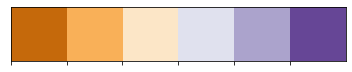

In [ ]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) 
pal = sns.color_palette('PuOr', 6) 
pal.as_hex() 

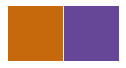

In [ ]:
import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) 

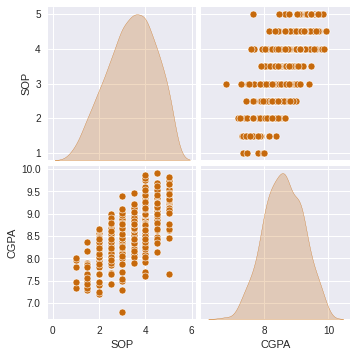

In [ ]:
sns.pairplot(Data,
             x_vars = ['SOP', 'CGPA'],
             y_vars =  ['SOP', 'CGPA'],
       diag_kind='kde'
             )

In [ ]:
trainDataset = Data.sample(frac=0.8, random_state=0) 
print(trainDataset.head())

     SOP  CGPA
132  3.5  8.56
309  3.5  8.60
341  3.5  8.76
196  3.0  8.26
246  3.0  8.73


In [ ]:
testDataset= Data.drop(trainDataset.index)
print(testDataset.head())

    SOP  CGPA
9   3.5   8.6
25  4.5   9.6
28  2.0   7.2
31  4.0   8.3
32  3.0   9.4


In [ ]:
print(trainDataset.shape)
print(testDataset.shape)

(320, 2)
(80, 2)


In [ ]:

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     SOP  CGPA
132  3.5  8.56
309  3.5  8.60
341  3.5  8.76
196  3.0  8.26
246  3.0  8.73
    SOP  CGPA
9   3.5   8.6
25  4.5   9.6
28  2.0   7.2
31  4.0   8.3
32  3.0   9.4


In [ ]:
trainLabels = trainFeatures.pop('CGPA')
testLabels = testFeatures.pop('CGPA')

print(trainLabels.head())
print(testLabels.head())

132    8.56
309    8.60
341    8.76
196    8.26
246    8.73
Name: CGPA, dtype: float64
9     8.6
25    9.6
28    7.2
31    8.3
32    9.4
Name: CGPA, dtype: float64


In [ ]:
print(trainFeatures.head())
print(testFeatures.head())

     SOP
132  3.5
309  3.5
341  3.5
196  3.0
246  3.0
    SOP
9   3.5
25  4.5
28  2.0
31  4.0
32  3.0


In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)

])

In [ ]:
model.compile(
    loss = 'mean_absolute_error', 
    optimizer = tf.keras.optimizers.Adam(0.001), 
    metrics = ['mae', 'mse'] 
)

In [ ]:
numEpochs = 500
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/500
10/10 [==============================] - 1s 21ms/step - loss: 6.3411 - mae: 6.3411 - mse: 40.4139 - val_loss: 6.2907 - val_mae: 6.2907 - val_mse: 39.9084
Epoch 2/500
10/10 [==============================] - 0s 4ms/step - loss: 6.2974 - mae: 6.2974 - mse: 39.8669 - val_loss: 6.2457 - val_mae: 6.2457 - val_mse: 39.3504
Epoch 3/500
10/10 [==============================] - 0s 4ms/step - loss: 6.2539 - mae: 6.2539 - mse: 39.3248 - val_loss: 6.2006 - val_mae: 6.2006 - val_mse: 38.7960
Epoch 4/500
10/10 [==============================] - 0s 4ms/step - loss: 6.2099 - mae: 6.2099 - mse: 38.7804 - val_loss: 6.1558 - val_mae: 6.1558 - val_mse: 38.2485
Epoch 5/500
10/10 [==============================] - 0s 4ms/step - loss: 6.1666 - mae: 6.1666 - mse: 38.2498 - val_loss: 6.1106 - val_mae: 6.1106 - val_mse: 37.7019
Epoch 6/500
10/10 [==============================] - 0s 4ms/step - loss: 6.1226 - mae: 6.1226 - mse: 37.7149 - val_loss: 6.0658 - val_mae: 6.0658 - val_mse: 37.1632
Epoch 7/5

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


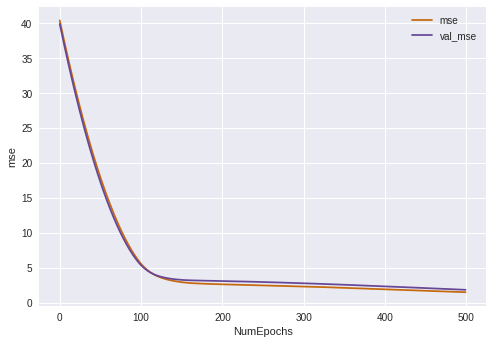

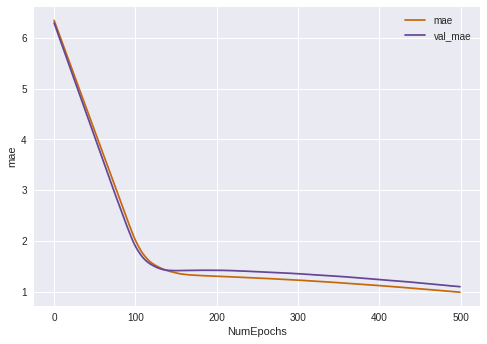

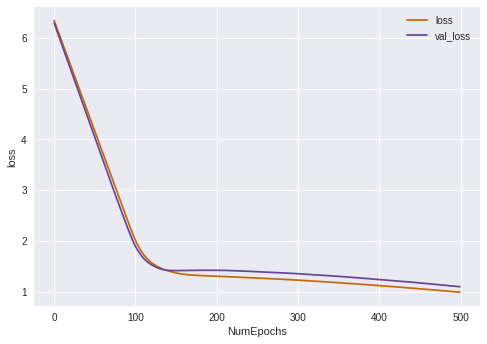

In [ ]:
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [ ]:
model.predict([1])

array([[4.5385823]], dtype=float32)

In [ ]:
print(f'Prediction for input value 1: {model.predict([1])}')


tempListforPreds = [1,2,3,4,5]
print(f'''

input List = {tempListforPreds}


List of Predictions:
{model.predict(tempListforPreds)}

List of Predictions (flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 1: [[4.5385823]]


input List = [1, 2, 3, 4, 5]


List of Predictions:
[[ 4.5385823]
 [ 6.101493 ]
 [ 7.664403 ]
 [ 9.227313 ]
 [10.790223 ]]

List of Predictions (flattened out):
[ 4.5385823  6.101493   7.664403   9.227313  10.790223 ]



In [ ]:
print(testFeatures)

     SOP
9    3.5
25   4.5
28   2.0
31   4.0
32   3.0
..   ...
370  2.5
372  4.5
384  5.0
386  2.5
398  3.5

[80 rows x 1 columns]


In [ ]:
testPreds = model.predict(testFeatures).flatten() 

In [ ]:
print(len(testPreds))
print(testPreds)

80
[ 8.445858  10.008768   6.101493   9.227313   7.664403   7.664403
  9.227313   6.882948  10.008768   9.227313   9.227313  10.790223
 10.790223  10.790223  10.008768   8.445858  10.008768  10.790223
  9.227313   9.227313  10.008768   6.101493   7.664403  10.008768
  6.882948   8.445858  10.790223   7.664403  10.790223   8.445858
 10.008768   9.227313   9.227313   8.445858   9.227313  10.008768
 10.008768  10.008768   7.664403   8.445858  10.008768   9.227313
 10.790223   8.445858   8.445858   6.882948   6.882948   9.227313
  6.882948   6.882948   7.664403   4.5385823  6.882948   9.227313
 10.790223   6.882948   5.320038   4.5385823  7.664403   9.227313
  6.101493   7.664403   7.664403   9.227313  10.790223   9.227313
  5.320038   4.5385823  8.445858   6.101493   8.445858   6.101493
 10.008768   8.445858   6.101493   6.882948  10.008768  10.790223
  6.882948   8.445858 ]


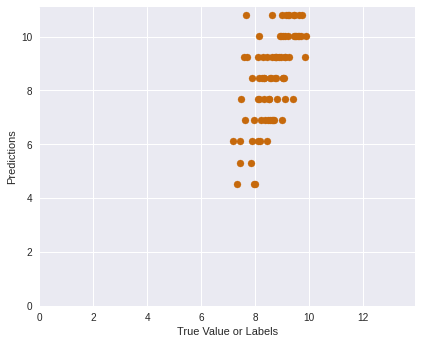

In [ ]:
def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels, testPreds)

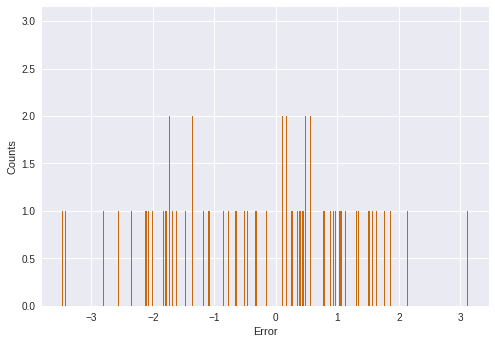

In [ ]:
def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)